In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

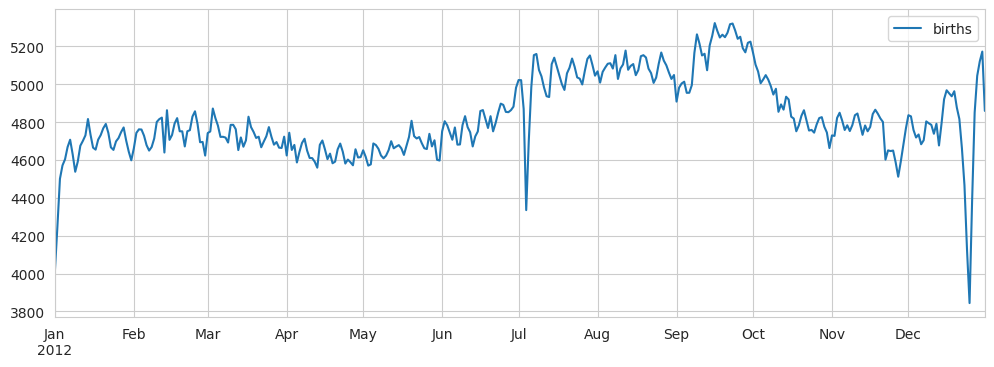

In [6]:
births = pd.read_csv('births.csv')
quartiles = np.percentile(births['births'], [20, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig)& (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])
births_by_date.index = [pd.Timestamp(2012, month, day)
                       for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

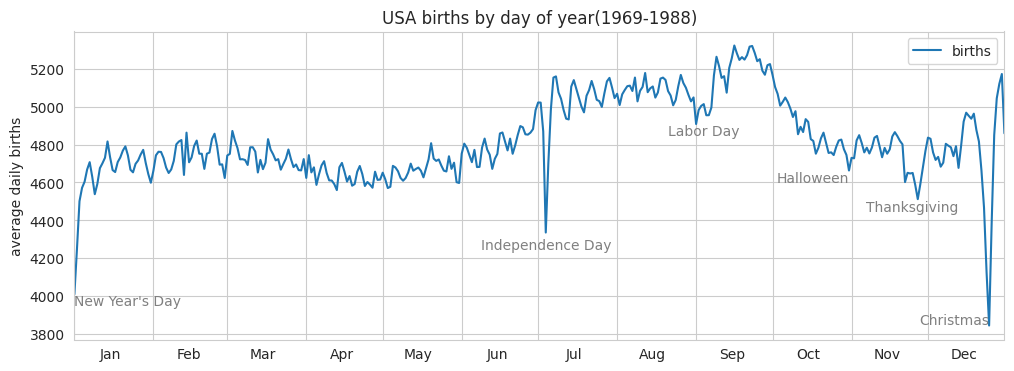

In [14]:
#Adding labels to the plot
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

#add labels
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha='right', **style)

#add labels to axis
ax.set(title='USA births by day of year(1969-1988)',
      ylabel='average daily births')

#format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

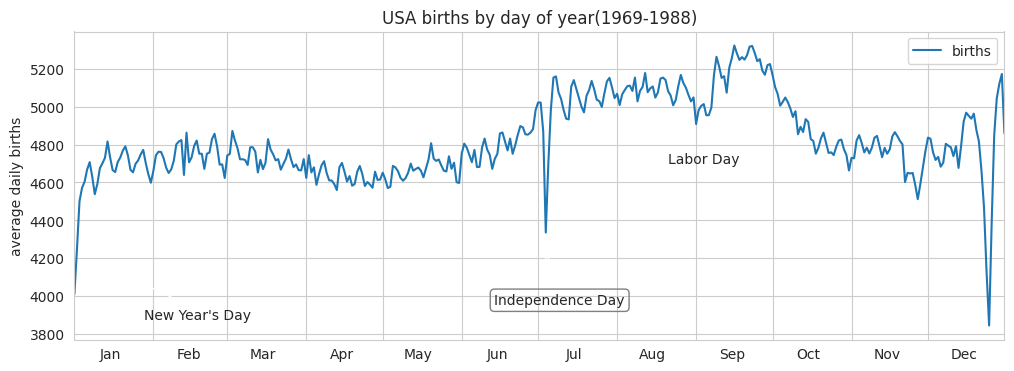

In [27]:
#Arrows and Annotations
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

#Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
           xytext=(50,-30), textcoords='offset points',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3,rad=0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="grey"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate("Labor Day", xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|, widthA=0.2,widthB=0.2', })
#add labels to axes
ax.set(title='USA births by day of year(1969-1988)',
      ylabel='average daily births')

#format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))